In [ ]:
pip install tensorflow --user

!pip install textstat

In [ ]:
!pip install keras

In [ ]:
!pip install xgboost

In [ ]:
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import re
import datetime
import time
import textstat
from bs4 import BeautifulSoup
from collections import Counter
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from gensim.models import KeyedVectors
from gensim.models.keyedvectors import Word2VecKeyedVectors
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [ ]:
import nltk
# nltk.download('punkt') If needed
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from bs4 import BeautifulSoup ## handles html
import re ## provides regular expressions functionality
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [155]:
!pip install tensorflow

In [156]:
from tensorflow import keras

In [157]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model
from keras.layers import Input, concatenate, Dense, Embedding, LSTM, GRU, Bidirectional, BatchNormalization, Dropout
from keras.initializers import Constant
from keras.callbacks import EarlyStopping

In [449]:
train = pd.read_csv("C:/Users/ASUS/Desktop/nlp airbnb/train.csv", sep=",", encoding="utf-8")
test = pd.read_csv("C:/Users/ASUS/Desktop/nlp airbnb/test.csv", sep=",", encoding="utf-8")

In [246]:
train_review = pd.read_csv("C:/Users/ASUS/Desktop/nlp airbnb/reviews.csv", sep=",", encoding="utf-8")

In [247]:
train_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1540778 entries, 0 to 1540777
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   reviewer_id  1540778 non-null  int64 
 1   comments     1540087 non-null  object
 2   review_id    1540778 non-null  int64 
 3   listing_id   1540778 non-null  object
dtypes: int64(2), object(2)
memory usage: 47.0+ MB


In [248]:
train_review.head()

,reviewer_id,comments,review_id,listing_id
0,93896,"The flat was bright, comfortable and clean and...",30672,8Z94Z3WMCO
1,97890,We stayed with Adriano and Valerio for a week ...,32236,8Z94Z3WMCO
2,104133,Adriano was a fantastic host. We felt very at ...,41044,8Z94Z3WMCO
3,122714,We had a most wonderful stay with Adriano and ...,48926,8Z94Z3WMCO
4,111543,I'm not sure which of us misunderstood the s...,58352,8Z94Z3WMCO


In [249]:
train.columns

Index(['name', 'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'transit', 'house_rules', 'picture_url',
       'host_id', 'host_since', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'zipcode', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'price', 'guests_included',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'cancellation_policy', 'reviews_per_month',
       'listing_id'],
      dtype='object')

In [251]:
train[train.host_id == train.host_id[2]]

,name,summary,space,description,experiences_offered,neighborhood_overview,transit,house_rules,picture_url,host_id,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,reviews_per_month,listing_id
2,Comfi apartment 2 close to wimbledon tennis court,NaN,NaN,NaN,none,NaN,NaN,1- No party or event allowed. 2-No smoking ins...,https://a0.muscache.com/im/pictures/e7e4a740-d...,272000199,...,84.0,9.0,9.0,10.0,10.0,9.0,8.0,strict_14_with_grace_period,1.73,SND9OPN6IY
7142,Comfi apartment close to wimbledon tennis court,NaN,NaN,NaN,none,NaN,NaN,1- No party or event allowed. 2-No smoking ins...,https://a0.muscache.com/im/pictures/d868dd7b-9...,272000199,...,83.0,9.0,9.0,9.0,9.0,9.0,9.0,strict_14_with_grace_period,1.08,YXVNJNL4EZ


In [252]:
train.head()

,name,summary,space,description,experiences_offered,neighborhood_overview,transit,house_rules,picture_url,host_id,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,reviews_per_month,listing_id
0,Attic Room in historic Greenwich,The room does not have a door but its own disc...,Double room available in historic royal Greenw...,The room does not have a door but its own disc...,business,NaN,Parking is restricted in London. Visitors park...,no shoes on carpets no food in attic room no o...,https://a0.muscache.com/im/pictures/20045164/7...,2167992,...,95.0,10.0,10.0,10.0,10.0,10.0,10.0,strict_14_with_grace_period,2.37,9Q1RD6H7IO
1,Lovely Garden Studio Private Access,"Garden studio with private entrance, 5 minutes...","Beautiful studio with a king size bed, a sofa ...","Garden studio with private entrance, 5 minutes...",none,Crouch End is a very hip and friendly neighbou...,Walk across the street to the W3 bus stop and ...,We'd love it if you would remove your shoes at...,https://a0.muscache.com/im/pictures/8d1ddcdc-f...,16148175,...,99.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate,2.97,6XDPZPGLSR
2,Comfi apartment 2 close to wimbledon tennis court,NaN,NaN,NaN,none,NaN,NaN,1- No party or event allowed. 2-No smoking ins...,https://a0.muscache.com/im/pictures/e7e4a740-d...,272000199,...,84.0,9.0,9.0,10.0,10.0,9.0,8.0,strict_14_with_grace_period,1.73,SND9OPN6IY
3,Luxury room in the heart of London - SW4,Luxury first floor Victorian split level maiso...,"Your room will be fully furnished, and it will...",Luxury first floor Victorian split level maiso...,none,"Gail coffee shop, just round the corner as wel...",Happy to advise on things to do in London and ...,- Check-in after 18:30pm and no later than 20:...,https://a0.muscache.com/im/pictures/7c2b2fcc-e...,3361233,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,NaN,SE3B7BXN9G
4,Excellent city Apartment with Private Patio,"NEW luxury apartment, with private outside pat...","A modern, well-equipped, cosy apartment close ...","NEW luxury apartment, with private outside pat...",none,NaN,NaN,"I am very happy for your visit, but please car...",https://a0.muscache.com/im/pictures/ca1494da-f...,94317022,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,strict_14_with_grace_period,2.32,E0C82VK0VF


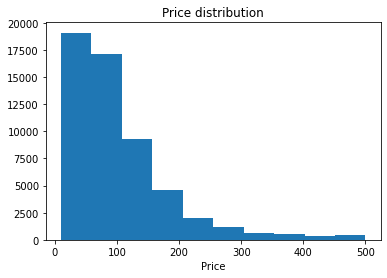

In [253]:
# Show target distribution
plt.hist(train.price)
plt.xlabel('Price')
plt.title('Price distribution')
plt.show();

In [450]:
train.isnull().sum()/55284 * 100

name                            0.025324
summary                         5.343318
space                          30.535055
description                     3.122061
experiences_offered             0.000000
neighborhood_overview          35.283265
transit                        35.827726
house_rules                    42.287099
picture_url                     0.000000
host_id                         0.000000
host_since                      0.200781
host_response_time             32.200998
host_response_rate             32.200998
host_is_superhost               0.200781
host_total_listings_count       0.200781
host_has_profile_pic            0.200781
host_identity_verified          0.200781
neighbourhood                   0.265900
neighbourhood_cleansed          0.000000
zipcode                         2.300847
latitude                        0.000000
longitude                       0.000000
property_type                   0.000000
room_type                       0.000000
accommodates    

In [256]:
train['reviews_per_month'].describe()

count    42904.000000
mean         1.164464
std          1.353820
min          0.010000
25%          0.240000
50%          0.730000
75%          1.570000
max         22.040000
Name: reviews_per_month, dtype: float64

In [257]:
train_duplicate = train

In [258]:
train_duplicate[train_duplicate.duplicated()]

,name,summary,space,description,experiences_offered,neighborhood_overview,transit,house_rules,picture_url,host_id,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,reviews_per_month,listing_id


In [259]:
train.review_scores_rating.value_counts()

100.0    11680
98.0      2640
97.0      2489
93.0      2466
96.0      2454
95.0      2315
90.0      2223
80.0      2127
99.0      1730
94.0      1574
92.0      1229
91.0      1166
87.0       998
88.0       884
89.0       848
85.0       648
60.0       535
86.0       513
84.0       506
83.0       420
82.0       247
70.0       230
73.0       230
20.0       170
81.0       169
40.0       152
78.0       152
77.0       147
76.0       146
75.0       127
79.0       119
67.0        98
50.0        69
72.0        54
74.0        53
65.0        50
71.0        38
68.0        33
64.0        32
69.0        24
53.0        16
66.0        12
55.0        12
63.0         9
47.0         7
57.0         5
56.0         4
52.0         3
58.0         3
54.0         2
30.0         2
61.0         2
45.0         2
62.0         2
32.0         1
44.0         1
37.0         1
Name: review_scores_rating, dtype: int64

In [260]:
train.host_response_rate.value_counts()

100%    25860
90%      1439
98%      1015
97%       957
99%       747
        ...  
22%         2
31%         1
11%         1
27%         1
42%         1
Name: host_response_rate, Length: 69, dtype: int64

In [261]:
train['host_response_time'].isnull().sum()

17802

In [262]:
train['zipcode'].mode()

0    E1
Name: zipcode, dtype: object

## Cleaning test dataset

In [451]:
test['host_is_superhost'].fillna(0,inplace = True) #replacing NA with 0, assuming 0 is false value. 
test.host_is_superhost[test.host_is_superhost == "t"] = 1 #replacing "t" with 1
test.host_is_superhost[test.host_is_superhost == "f"] = 0 #replacing "f" with 0
test["host_is_superhost"] = test["host_is_superhost"].astype("int64") #converting host_is_superhost to boolean datatype
test['host_has_profile_pic'].fillna(0,inplace = True) #replacing NA with 0, assuming 0 is false value. 
test.host_has_profile_pic[test.host_has_profile_pic == "t"] = 1 #replacing "t" with 1
test.host_has_profile_pic[test.host_has_profile_pic == "f"] = 0 #replacing "f" with 0
test["host_has_profile_pic"] = test["host_has_profile_pic"].astype("int64") #converting host_is_superhost to boolean datatype

test['host_identity_verified'].fillna(0,inplace = True) #replacing NA with 0, assuming 0 is false value. 
test.host_identity_verified[test.host_identity_verified == "t"] = 1 #replacing "t" with 1
test.host_identity_verified[test.host_identity_verified == "f"] = 0 #replacing "f" with 0
test["host_identity_verified"] = test["host_identity_verified"].astype("int64") #converting host_is_superhost to boolean datatyp
test['host_total_listings_count'].fillna(test['host_total_listings_count'].mean(),inplace = True) #replacing NA with mean of 'host_total_listings_count']
test['zipcode'].fillna('E1',inplace = True) #replacing NA with most frequently occuring zipcode 
test['bathrooms'].fillna(test['bathrooms'].mean(),inplace = True) #replacing NA with most frequently occuring zipcode 
test['bedrooms'].fillna(test['bedrooms'].mean(),inplace = True) #replacing NA with most frequently occuring zipcode 
test['beds'].fillna(test['beds'].mean(),inplace = True) #replacing NA with most frequently occuring zipcode 

test['review_scores_rating'].fillna(test['review_scores_rating'].mean(),inplace = True)
test['review_scores_accuracy'].fillna(test['review_scores_accuracy'].mean(),inplace = True)
test['review_scores_cleanliness'].fillna(test['review_scores_cleanliness'].mean(),inplace = True)
test['review_scores_checkin'].fillna(test['review_scores_checkin'].mean(),inplace = True)
test['review_scores_communication'].fillna(test['review_scores_communication'].mean(),inplace = True)
test['review_scores_location'].fillna(test['review_scores_location'].mean(),inplace = True)
test['review_scores_value'].fillna(test['review_scores_value'].mean(),inplace = True)
test['reviews_per_month'].fillna(test['reviews_per_month'].mean(),inplace = True)

test['summary'].fillna('empty',inplace = True)
test["property_type"] = test["property_type"].astype("category") 
test["room_type"] = test["room_type"].astype("category") 
test["bed_type"] = test["bed_type"].astype("category") 
test['host_response_time'].fillna("missing",inplace = True)
test["host_response_time"] = test["host_response_time"].astype("category")



<ipython-input-451-1ddaa847e3e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.host_is_superhost[test.host_is_superhost == "t"] = 1 #replacing "t" with 1
<ipython-input-451-1ddaa847e3e5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.host_is_superhost[test.host_is_superhost == "f"] = 0 #replacing "f" with 0
<ipython-input-451-1ddaa847e3e5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.host_has_profile_pic[test.ho

In [452]:
test["host_since"] = test["host_since"].astype("datetime64[ns]")
test["host_since"].fillna(pd.to_datetime('2015-05-21'),inplace = True)
test['host_days'] = (datetime.datetime.today() - test['host_since'])//np.timedelta64(1,'D')   
test['host_days'] = test['host_days']/365
x_test_dummies = pd.get_dummies(test, columns = ['host_response_time','room_type','bed_type'], drop_first=True)          
x_test_dummies = x_test_dummies.select_dtypes(exclude=["category","datetime64[ns]","object"])
x_test_dummies.drop(["host_id","latitude","longitude"], inplace=True, axis=1)

## Cleaning Train Dataset

In [453]:
train['host_is_superhost'].fillna(0,inplace = True) #replacing NA with 0, assuming 0 is false value. 
train.host_is_superhost[train.host_is_superhost == "t"] = 1 #replacing "t" with 1
train.host_is_superhost[train.host_is_superhost == "f"] = 0 #replacing "f" with 0
train["host_is_superhost"] = train["host_is_superhost"].astype("int64") #converting host_is_superhost to boolean datatype
train['host_has_profile_pic'].fillna(0,inplace = True) #replacing NA with 0, assuming 0 is false value. 
train.host_has_profile_pic[train.host_has_profile_pic == "t"] = 1 #replacing "t" with 1
train.host_has_profile_pic[train.host_has_profile_pic == "f"] = 0 #replacing "f" with 0
train["host_has_profile_pic"] = train["host_has_profile_pic"].astype("int64") #converting host_is_superhost to boolean datatype

train['host_identity_verified'].fillna(0,inplace = True) #replacing NA with 0, assuming 0 is false value. 
train.host_identity_verified[train.host_identity_verified == "t"] = 1 #replacing "t" with 1
train.host_identity_verified[train.host_identity_verified == "f"] = 0 #replacing "f" with 0
train["host_identity_verified"] = train["host_identity_verified"].astype("int64") #converting host_is_superhost to boolean datatyp


<ipython-input-453-4d5b283f1bee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.host_is_superhost[train.host_is_superhost == "t"] = 1 #replacing "t" with 1
<ipython-input-453-4d5b283f1bee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.host_is_superhost[train.host_is_superhost == "f"] = 0 #replacing "f" with 0
<ipython-input-453-4d5b283f1bee>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.host_has_profile_pic[tr

In [454]:
train['bathrooms'].isnull().sum()

70

In [455]:
train['host_total_listings_count'].fillna(train['host_total_listings_count'].mean(),inplace = True) #replacing NA with mean of 'host_total_listings_count']

In [456]:
train['neighbourhood'].mode()


0    City of Westminster
Name: neighbourhood, dtype: object

In [457]:
train['neighbourhood'].fillna('City of Westminster',inplace = True) #replacing NA with most frequently occuring neighbourhood

In [458]:
train['zipcode'].mode()

0    E1
Name: zipcode, dtype: object

In [459]:
train['zipcode'].fillna('E1',inplace = True) #replacing NA with most frequently occuring zipcode 

In [460]:
train['bathrooms'].fillna(train['bathrooms'].mean(),inplace = True) #replacing NA with most frequently occuring zipcode 

In [461]:
train['bedrooms'].fillna(train['bedrooms'].mean(),inplace = True) #replacing NA with most frequently occuring zipcode 

In [462]:
train['beds'].fillna(train['beds'].mean(),inplace = True) #replacing NA with most frequently occuring zipcode 

In [463]:
train['review_scores_rating'].fillna(train['review_scores_rating'].mean(),inplace = True)
train['review_scores_accuracy'].fillna(train['review_scores_accuracy'].mean(),inplace = True)
train['review_scores_cleanliness'].fillna(train['review_scores_cleanliness'].mean(),inplace = True)
train['review_scores_checkin'].fillna(train['review_scores_checkin'].mean(),inplace = True)
train['review_scores_communication'].fillna(train['review_scores_communication'].mean(),inplace = True)
train['review_scores_location'].fillna(train['review_scores_location'].mean(),inplace = True)
train['review_scores_value'].fillna(train['review_scores_value'].mean(),inplace = True)
train['reviews_per_month'].fillna(train['reviews_per_month'].mean(),inplace = True)


In [464]:
train['summary'].fillna('empty',inplace = True)
train["property_type"] = train["property_type"].astype("category") 
train["room_type"] = train["room_type"].astype("category") 
train["bed_type"] = train["bed_type"].astype("category") 
train['host_response_time'].fillna("missing",inplace = True)
train["host_response_time"] = train["host_response_time"].astype("category") 


In [465]:
train.head()

,name,summary,space,description,experiences_offered,neighborhood_overview,transit,house_rules,picture_url,host_id,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,reviews_per_month,listing_id
0,Attic Room in historic Greenwich,The room does not have a door but its own disc...,Double room available in historic royal Greenw...,The room does not have a door but its own disc...,business,NaN,Parking is restricted in London. Visitors park...,no shoes on carpets no food in attic room no o...,https://a0.muscache.com/im/pictures/20045164/7...,2167992,...,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,strict_14_with_grace_period,2.370000,9Q1RD6H7IO
1,Lovely Garden Studio Private Access,"Garden studio with private entrance, 5 minutes...","Beautiful studio with a king size bed, a sofa ...","Garden studio with private entrance, 5 minutes...",none,Crouch End is a very hip and friendly neighbou...,Walk across the street to the W3 bus stop and ...,We'd love it if you would remove your shoes at...,https://a0.muscache.com/im/pictures/8d1ddcdc-f...,16148175,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,moderate,2.970000,6XDPZPGLSR
2,Comfi apartment 2 close to wimbledon tennis court,empty,NaN,NaN,none,NaN,NaN,1- No party or event allowed. 2-No smoking ins...,https://a0.muscache.com/im/pictures/e7e4a740-d...,272000199,...,84.000000,9.000000,9.000000,10.000000,10.000000,9.000000,8.000000,strict_14_with_grace_period,1.730000,SND9OPN6IY
3,Luxury room in the heart of London - SW4,Luxury first floor Victorian split level maiso...,"Your room will be fully furnished, and it will...",Luxury first floor Victorian split level maiso...,none,"Gail coffee shop, just round the corner as wel...",Happy to advise on things to do in London and ...,- Check-in after 18:30pm and no later than 20:...,https://a0.muscache.com/im/pictures/7c2b2fcc-e...,3361233,...,92.533044,9.502868,9.261484,9.622043,9.652851,9.541623,9.262846,flexible,1.164464,SE3B7BXN9G
4,Excellent city Apartment with Private Patio,"NEW luxury apartment, with private outside pat...","A modern, well-equipped, cosy apartment close ...","NEW luxury apartment, with private outside pat...",none,NaN,NaN,"I am very happy for your visit, but please car...",https://a0.muscache.com/im/pictures/ca1494da-f...,94317022,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,strict_14_with_grace_period,2.320000,E0C82VK0VF


In [466]:
train['summary'].fillna('empty',inplace = True)
train['name'].fillna('empty',inplace = True)
train['space'].fillna('empty',inplace = True)
train['description'].fillna('empty',inplace = True)
train['neighborhood_overview'].fillna('empty',inplace = True)
train['transit'].fillna('empty',inplace = True)
train['house_rules'].fillna('empty',inplace = True)

## Cleaning Text Data

In [279]:
def remove_whitespace(text):
    """ Function to remove whitespace (tabs, newlines). """
    return ' '.join(text.split())

In [280]:
from bs4 import BeautifulSoup

In [281]:
def remove_punctuation_and_casing(text):
    """
    Function to remove the punctuation, upper casing and words that include
    non-alphanumeric characters.
    """
    chars = '!\"#$%&()*+,-./:;<=>?@[\]^_`{|}~'
    text = text.translate(str.maketrans(chars, ' ' * len(chars)))
    return ' '.join([word.lower() for word in text.split() if word.isalpha()])

In [282]:
from nltk.corpus import stopwords

english_stopwords = stopwords.words('english')

In [283]:
def remove_stopwords(text):
    """ Function to remove stopwords. """
    return ' '.join([word for word in str(text).split() if word not in english_stopwords])

In [284]:
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    """Helper function that calls the POS tagger for an input word and return a code that can be used for lemmatization"""
    # Extract the first letter of the POS tag (see the above example to understand the output coming from pos_tag)
    tag = nltk.pos_tag([word])[0][1][0].upper()  
    # Dictionary to map these letters to wordnet codes that the lemmatizer understands
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [285]:
def text_cleaning(documents):
    """
    Function for standard NLP pre-processing including removal of html tags,
    whitespaces, non-alphanumeric characters, and stopwords. Emoticons are
    converted to text that reflects their meaning. Words are subject to
    lemmatization using their POS tags.
    """
    cleaned_text = []  # our output will be a list of documents
    lemmatizer = WordNetLemmatizer()
    
    print('Processing input array with {} elements...'.format(documents.shape[0]))
    counter = 0
    
    for doc in documents:
        text = BeautifulSoup(doc).get_text() # remove html content
        text = remove_whitespace(text) # remove whitespaces
        text = remove_punctuation_and_casing(text) # remove punctuation and casing
        text = remove_stopwords(text) # remove stopwords
        text = ' '.join([lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in text.split()]) # lemmatize each word
        
        cleaned_text.append(text)

        if (counter > 0 and counter % 50 == 0):
            print('Processed {} documents'.format(counter))
            
        counter += 1
        
    return cleaned_text


In [286]:
nltk.download('stopwords') ## to identify stopwords 
nltk.download('averaged_perceptron_tagger') ## for part-of-speech tagging (used for lemmatization)
nltk.download('omw-1.4')
nltk.download('wordnet')

# Lemmatize with POS Tag (Parts of Speech tagging)
def get_wordnet_pos(word):
    """Map POS tag to first character for lemmatization"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

## function to clean text data
def clean_reviews(df):
    """ Standard NLP pre-processing chain including removal of html tags, non-alphanumeric characters, and stopwords.
        Words are subject to lemmatization using their POS tags, which are determind using WordNet. 
    """
    reviews = []

    lemmatizer = WordNetLemmatizer()
    
    print('*' * 40)
    print('Cleaning {} movie reviews.'.format(df.shape[0]))
    counter = 0
    for review in df:
        
        # remove html content
        review_text = BeautifulSoup(review).get_text()
        
        # remove non-alphabetic characters
        review_text = re.sub("[^a-zA-Z]"," ", review_text)
    
        # tokenize the sentences with all capital letters transformed to lower case
        words = word_tokenize(review_text.lower())
  
        # filter stopwords
        words = [w for w in words if w not in stopwords.words("english")]
        
        # lemmatize each word to its lemma
        lemma_words =[lemmatizer.lemmatize(i, get_wordnet_pos(i)) for i in words]
    
        reviews.append(lemma_words)
              
        if (counter > 0 and counter % 500 == 0):
            print('Processed {} reviews'.format(counter))
            
        counter += 1
        
    print('DONE')
    print('*' * 40)

    return(reviews) 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [233]:
summary_clean = clean_reviews(train.summary)

****************************************
Cleaning 55284 movie reviews.
Processed 500 reviews
Processed 1000 reviews
Processed 1500 reviews


C:\Users\ASUS\anaconda3\lib\site-packages\bs4\__init__.py:311: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


Processed 2000 reviews
Processed 2500 reviews
Processed 3000 reviews
Processed 3500 reviews
Processed 4000 reviews
Processed 4500 reviews
Processed 5000 reviews
Processed 5500 reviews
Processed 6000 reviews
Processed 6500 reviews
Processed 7000 reviews
Processed 7500 reviews
Processed 8000 reviews
Processed 8500 reviews
Processed 9000 reviews
Processed 9500 reviews
Processed 10000 reviews
Processed 10500 reviews
Processed 11000 reviews
Processed 11500 reviews
Processed 12000 reviews
Processed 12500 reviews
Processed 13000 reviews
Processed 13500 reviews
Processed 14000 reviews
Processed 14500 reviews
Processed 15000 reviews
Processed 15500 reviews
Processed 16000 reviews
Processed 16500 reviews
Processed 17000 reviews
Processed 17500 reviews
Processed 18000 reviews
Processed 18500 reviews
Processed 19000 reviews
Processed 19500 reviews
Processed 20000 reviews
Processed 20500 reviews
Processed 21000 reviews
Processed 21500 reviews
Processed 22000 reviews
Processed 22500 reviews
Processe

C:\Users\ASUS\anaconda3\lib\site-packages\bs4\__init__.py:311: UserWarning: "b'...'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


Processed 54000 reviews
Processed 54500 reviews
Processed 55000 reviews
DONE
****************************************


In [507]:
train["summary_clean"] = summary_clean

In [508]:
train.summary_clean

0        [room, door, discreet, staircase, light, airy,...
1        [garden, studio, private, entrance, minute, cr...
2                                                  [empty]
3        [luxury, first, floor, victorian, split, level...
4        [new, luxury, apartment, private, outside, pat...
                               ...                        
55279    [large, private, double, bedroom, available, b...
55280                                              [empty]
55281    [double, bedroom, apartment, family, friend, f...
55282    [amaze, bed, apartment, offer, ideal, base, tr...
55283    [spacious, bedroom, beautiful, ensuite, perfec...
Name: summary_clean, Length: 55284, dtype: object

In [289]:
train.summary

0        The room does not have a door but its own disc...
1        Garden studio with private entrance, 5 minutes...
2                                                    empty
3        Luxury first floor Victorian split level maiso...
4        NEW luxury apartment, with private outside pat...
                               ...                        
55279    Large private double bedroom available in a br...
55280                                                empty
55281    3 double bedroom APARTMENT for families and fr...
55282    This amazing 1 bed apartment offers an ideal b...
55283    This spacious bedroom with its beautiful ensui...
Name: summary, Length: 55284, dtype: object

In [222]:
#summary	space	description, neighborhood_overview	transit	house_rules
#'name','summary','space','description','experiences_offered','neighborhood_overview','transit','house_rules'
text_processed = text_cleaning(train.experiences_offered)
print(text_processed)

Processing input array with 55284 elements...
Processed 50 documents
Processed 100 documents
Processed 150 documents
Processed 200 documents
Processed 250 documents
Processed 300 documents
Processed 350 documents
Processed 400 documents
Processed 450 documents
Processed 500 documents
Processed 550 documents
Processed 600 documents
Processed 650 documents
Processed 700 documents
Processed 750 documents
Processed 800 documents
Processed 850 documents
Processed 900 documents
Processed 950 documents
Processed 1000 documents
Processed 1050 documents
Processed 1100 documents
Processed 1150 documents
Processed 1200 documents
Processed 1250 documents
Processed 1300 documents
Processed 1350 documents
Processed 1400 documents
Processed 1450 documents
Processed 1500 documents
Processed 1550 documents
Processed 1600 documents
Processed 1650 documents
Processed 1700 documents
Processed 1750 documents
Processed 1800 documents
Processed 1850 documents
Processed 1900 documents
Processed 1950 documents

Processed 16150 documents
Processed 16200 documents
Processed 16250 documents
Processed 16300 documents
Processed 16350 documents
Processed 16400 documents
Processed 16450 documents
Processed 16500 documents
Processed 16550 documents
Processed 16600 documents
Processed 16650 documents
Processed 16700 documents
Processed 16750 documents
Processed 16800 documents
Processed 16850 documents
Processed 16900 documents
Processed 16950 documents
Processed 17000 documents
Processed 17050 documents
Processed 17100 documents
Processed 17150 documents
Processed 17200 documents
Processed 17250 documents
Processed 17300 documents
Processed 17350 documents
Processed 17400 documents
Processed 17450 documents
Processed 17500 documents
Processed 17550 documents
Processed 17600 documents
Processed 17650 documents
Processed 17700 documents
Processed 17750 documents
Processed 17800 documents
Processed 17850 documents
Processed 17900 documents
Processed 17950 documents
Processed 18000 documents
Processed 18

Processed 32100 documents
Processed 32150 documents
Processed 32200 documents
Processed 32250 documents
Processed 32300 documents
Processed 32350 documents
Processed 32400 documents
Processed 32450 documents
Processed 32500 documents
Processed 32550 documents
Processed 32600 documents
Processed 32650 documents
Processed 32700 documents
Processed 32750 documents
Processed 32800 documents
Processed 32850 documents
Processed 32900 documents
Processed 32950 documents
Processed 33000 documents
Processed 33050 documents
Processed 33100 documents
Processed 33150 documents
Processed 33200 documents
Processed 33250 documents
Processed 33300 documents
Processed 33350 documents
Processed 33400 documents
Processed 33450 documents
Processed 33500 documents
Processed 33550 documents
Processed 33600 documents
Processed 33650 documents
Processed 33700 documents
Processed 33750 documents
Processed 33800 documents
Processed 33850 documents
Processed 33900 documents
Processed 33950 documents
Processed 34

Processed 47950 documents
Processed 48000 documents
Processed 48050 documents
Processed 48100 documents
Processed 48150 documents
Processed 48200 documents
Processed 48250 documents
Processed 48300 documents
Processed 48350 documents
Processed 48400 documents
Processed 48450 documents
Processed 48500 documents
Processed 48550 documents
Processed 48600 documents
Processed 48650 documents
Processed 48700 documents
Processed 48750 documents
Processed 48800 documents
Processed 48850 documents
Processed 48900 documents
Processed 48950 documents
Processed 49000 documents
Processed 49050 documents
Processed 49100 documents
Processed 49150 documents
Processed 49200 documents
Processed 49250 documents
Processed 49300 documents
Processed 49350 documents
Processed 49400 documents
Processed 49450 documents
Processed 49500 documents
Processed 49550 documents
Processed 49600 documents
Processed 49650 documents
Processed 49700 documents
Processed 49750 documents
Processed 49800 documents
Processed 49

# Modeling

### using only numerical data and FNN

In [302]:
train["host_since"].mode()

0   2015-05-21
Name: host_since, dtype: datetime64[ns]

In [467]:
train["host_since"] = train["host_since"].astype("datetime64[ns]")
train["host_since"].fillna(pd.to_datetime('2015-05-21'),inplace = True)
train['host_days'] = (datetime.datetime.today() - train['host_since'])//np.timedelta64(1,'D')   
train['host_days'] = train['host_days']/365

In [468]:
x_train_dummies = pd.get_dummies(train, columns = ['host_response_time','room_type','bed_type'], drop_first=True)          
x_train_dummies = x_train_dummies.select_dtypes(exclude=["category","datetime64[ns]","object"])
x_train_dummies.drop(["host_id","latitude","longitude"], inplace=True, axis=1)

In [375]:
x_train_dummies["summary_clean"] = summary_clean

In [469]:
x_train_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55284 entries, 0 to 55283
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   host_is_superhost                      55284 non-null  int64  
 1   host_total_listings_count              55284 non-null  float64
 2   host_has_profile_pic                   55284 non-null  int64  
 3   host_identity_verified                 55284 non-null  int64  
 4   accommodates                           55284 non-null  int64  
 5   bathrooms                              55284 non-null  float64
 6   bedrooms                               55284 non-null  float64
 7   beds                                   55284 non-null  float64
 8   price                                  55284 non-null  float64
 9   guests_included                        55284 non-null  int64  
 10  review_scores_rating                   55284 non-null  float64
 11  re

In [470]:
y = x_train_dummies[['price']]
x_train_dummies.pop("price")

0         35.0
1         75.0
2        120.0
3         50.0
4        104.0
         ...  
55279     65.0
55280     40.0
55281     89.0
55282     80.0
55283    110.0
Name: price, Length: 55284, dtype: float64

In [378]:
x_train_dummies.drop(["summary_clean"], inplace=True, axis=1)

In [471]:
seed=888
X_train, X_test, y_train, y_test = train_test_split(x_train_dummies, y, test_size=0.30, random_state=seed)
    
print (X_train.shape)
print(y_train.shape) 

(38698, 29)
(38698, 1)


In [472]:
nb_units = 128

In [473]:
 y.shape

(55284, 1)

In [344]:
from tensorflow import keras
from tensorflow.keras import layers

In [474]:
x_train_dummies.shape[1]

29

In [475]:
inputs = layers.Input(shape=(x_train_dummies.shape[1],))
layer1 = layers.Dense(nb_units,  activation='relu', #activation function
                kernel_initializer=keras.initializers.he_normal(seed=seed), #initialisation of weights, 
                bias_initializer='zeros')(inputs)
layer2 = layers.Dense(nb_units,activation='relu',kernel_initializer=keras.initializers.he_normal(seed=seed),bias_initializer='zeros')(layer1)
predictions = layers.Dense(nb_classes, activation='relu')(layer2)

model = keras.Model(inputs=inputs, outputs=predictions)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 29)]              0         
                                                                 
 dense_30 (Dense)            (None, 128)               3840      
                                                                 
 dense_31 (Dense)            (None, 128)               16512     
                                                                 
 dense_32 (Dense)            (None, 1)                 129       
                                                                 
Total params: 20,481
Trainable params: 20,481
Non-trainable params: 0
_________________________________________________________________


In [482]:
model.compile(optimizer='rmsprop', 
    loss='mse', 
    metrics=['mae']) 
    
history = model.fit(
    X_train, 
    y_train, 
    epochs = 5, 
    batch_size=1,
    validation_data=(X_test, y_test),
    verbose = 0) 

## make predictions
pred_ff_train = model.predict(X_train)
pred_ff_test = model.predict(X_test)

519/519 [==============================] - 1s 2ms/step


In [502]:
pred_ff_test = model.predict(X_test)

519/519 [==============================] - 2s 3ms/step


In [483]:
pred_ff_test = model.predict(x_test_dummies)

931/931 [==============================] - 1s 1ms/step


In [490]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29769 entries, 0 to 29768
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   name                         29759 non-null  object        
 1   summary                      29769 non-null  object        
 2   space                        20712 non-null  object        
 3   description                  28826 non-null  object        
 4   experiences_offered          29769 non-null  object        
 5   neighborhood_overview        19218 non-null  object        
 6   transit                      19097 non-null  object        
 7   house_rules                  17189 non-null  object        
 8   picture_url                  29769 non-null  object        
 9   host_id                      29769 non-null  int64         
 10  host_since                   29769 non-null  datetime64[ns]
 11  host_response_time           29769 non-nu

In [487]:
pred_ff_test.shape

(29769, 1)

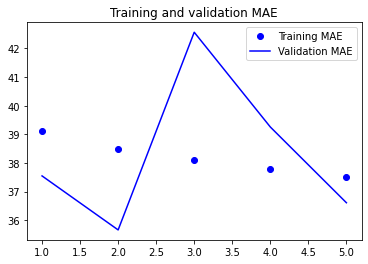

In [484]:
loss = history.history["mae"] 
val_loss = history.history["val_mae"] 
epochs = range(1, len(loss) + 1) 
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

In [485]:
score = model.evaluate(X_test, y_test, verbose=0)

In [495]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 3732.559326171875
Test accuracy: 36.609771728515625


In [498]:
from IPython.display import FileLink, FileLinks

In [492]:
pred_kaggle = pd.DataFrame(pred_ff_test, columns=['price'], index = test.listing_id)
pred_kaggle.to_csv('C:/Users/ASUS/Desktop/pred_kaggle.csv')

ModuleNotFoundError: No module named 'google.colab'

In [501]:
mean_squared_error(y_train,pred_ff_train)
pred_ff_test = model.predict(y_test)

3695.2208691489195

In [503]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,pred_ff_test))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test,pred_ff_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,pred_ff_test)))

Mean Absolute Error: 36.609759324431835
Mean Squared Error: 3732.558892480575
Root Mean Squared Error: 61.09467155555037


## modeling using only summary column and fnn

In [529]:
import io
import re
import string
import pandas as pd
import gensim
from gensim.models import Word2Vec  
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [724]:
Xclean_train, Xclean_val, y_train, y_val = train_test_split(train['summary'], train['price'], test_size = 0.2, random_state = 5)

In [725]:
X_train = Xclean_train.to_numpy()
X_val = Xclean_val.to_numpy()
y_train = y_train.to_numpy()
y_val = y_val.to_numpy()

In [624]:
Xclean_train.shape

(44227,)

In [625]:
def our_standardization(text_data):
  lowercase = tf.strings.lower(text_data) # convert to lowercase
  remove_html = tf.strings.regex_replace(lowercase, '<br />', ' ') # remove HTML tags
  pattern_remove_punctuation = '[%s]' % re.escape(string.punctuation) # pattern to remove punctuation
  remove_punct = tf.strings.regex_replace(remove_html, pattern_remove_punctuation, '') # apply pattern
  remove_double_spaces = tf.strings.regex_replace(remove_punct, '\s+', ' ') # remove double space
  return remove_double_spaces

In [626]:
# Define the size of the vocabulary and the max number of words in a sequence
vocab_size = 10000
seq_length = 100

# Create a vectorization layer
vectorize_layer = TextVectorization(
    standardize = our_standardization,
    max_tokens = vocab_size,
    output_sequence_length = seq_length
    )

In [627]:
vectorize_layer.adapt(X_train)

In [628]:
# Create a simple model to use word embeddings
embedding_dim = 16
model = Sequential([
  vectorize_layer,
  layers.Embedding(vocab_size, embedding_dim, name="embedding"), 
  layers.GlobalAveragePooling1D(), # each sample is reduced to the average of the word embeddings
  layers.Dense(1, activation='relu')
])

In [629]:
model.compile(optimizer='rmsprop', 
    loss='mse', 
    metrics=['mae']) 

In [630]:
model.fit(
    X_train,
    y_train,
    validation_data = (X_val, y_val),
    epochs=10)

Epoch 1/10
1383/1383 [==============================] - 10s 7ms/step - loss: 15510.0820 - mae: 91.7873 - val_loss: 12129.4561 - val_mae: 73.0741
Epoch 2/10
1383/1383 [==============================] - 8s 6ms/step - loss: 8897.8672 - mae: 60.9712 - val_loss: 7180.8037 - val_mae: 58.6119
Epoch 3/10
1383/1383 [==============================] - 8s 5ms/step - loss: 6996.1475 - mae: 58.7591 - val_loss: 6883.6714 - val_mae: 59.1670
Epoch 4/10
1383/1383 [==============================] - 8s 5ms/step - loss: 6766.1240 - mae: 58.1281 - val_loss: 6682.2065 - val_mae: 57.9468
Epoch 5/10
1383/1383 [==============================] - 8s 6ms/step - loss: 6568.7070 - mae: 57.0874 - val_loss: 6491.3232 - val_mae: 57.0538
Epoch 6/10
1383/1383 [==============================] - 9s 6ms/step - loss: 6378.8877 - mae: 56.0846 - val_loss: 6305.9775 - val_mae: 55.9811
Epoch 7/10
1383/1383 [==============================] - 9s 7ms/step - loss: 6191.6870 - mae: 55.0333 - val_loss: 6122.6157 - val_mae: 54.8132
Epo

In [635]:
pred_ff_train = model.predict(X_train)
pred_ff_test = model.predict(X_val)

346/346 [==============================] - 1s 3ms/step


In [636]:
pred_ff_test

array([[128.59785 ],
       [119.91537 ],
       [ 72.8589  ],
       ...,
       [120.22957 ],
       [129.7339  ],
       [116.578896]], dtype=float32)

In [637]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val,pred_ff_test))  
print('Mean Squared Error:', metrics.mean_squared_error(y_val,pred_ff_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val,pred_ff_test)))

Mean Absolute Error: 51.62829738772885
Mean Squared Error: 5602.042834097968
Root Mean Squared Error: 74.84679575037242


In [666]:
test_summary = test['summary'].to_numpy()

In [639]:
test_summary.shape

(29769,)

In [640]:
pred_ff_kaggle = model.predict(test_summary)

931/931 [==============================] - 4s 4ms/step


In [601]:
pred_kaggle_summary = pd.DataFrame(pred_ff_kaggle, columns=['price'], index = test.listing_id)
pred_kaggle_summary.to_csv('C:/Users/ASUS/Desktop/pred_kaggle_summary.csv')

## Simple RNN

In [726]:
X_train = vectorize_layer(X_train)
X_val = vectorize_layer(X_val)

In [709]:
vocab_size = 100
seq_length = 5

In [713]:
input = tf.keras.Input(shape=(sequence_length,), dtype="int64") 
emd = tf.one_hot(input, depth=vocab_size)
x = layers.SimpleRNN(32)(emd) 
output = layers.Dense(vocab_size, activation="relu")(x) 
model = tf.keras.Model(input, output) 


model.compile(optimizer='rmsprop', 
    loss='mse', 
    metrics=['mae'])
model.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 5)]               0         
                                                                 
 tf.one_hot_7 (TFOpLambda)   (None, 5, 100)            0         
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 32)                4256      
                                                                 
 dense_48 (Dense)            (None, 100)               3300      
                                                                 
Total params: 7,556
Trainable params: 7,556
Non-trainable params: 0
_________________________________________________________________


In [714]:
model.fit(
    X_train, 
    y_train, 
    validation_data=(X_val, y_val),
    epochs = 10, 
    batch_size=128) 

Epoch 1/10


ValueError: in user code:

    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "model_16" is incompatible with the layer: expected shape=(None, 5), found shape=(None, 100)


In [686]:
pred_ff_train = model.predict(X_train)
pred_ff_test = model.predict(X_val)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val,pred_ff_test))  
print('Mean Squared Error:', metrics.mean_squared_error(y_val,pred_ff_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val,pred_ff_test)))

346/346 [==============================] - 3s 7ms/step


ValueError: y_true and y_pred have different number of output (1!=100)

In [687]:
pred_ff_train.shape

(44227, 100)

In [693]:
pred_ff_test

array([[0.00999634, 0.01000223, 0.01000171, ..., 0.00999685, 0.00999692,
        0.01000342],
       [0.00999603, 0.010002  , 0.01000163, ..., 0.00999693, 0.00999729,
        0.01000352],
       [0.00999635, 0.0100022 , 0.01000165, ..., 0.00999676, 0.00999703,
        0.01000346],
       ...,
       [0.00997887, 0.00996183, 0.00997597, ..., 0.00995857, 0.00998033,
        0.00999675],
       [0.00999636, 0.01000222, 0.01000174, ..., 0.00999686, 0.00999687,
        0.01000344],
       [0.00998381, 0.00999684, 0.00997733, ..., 0.01000222, 0.00997241,
        0.0099929 ]], dtype=float32)

In [691]:
y_val

array([500.,  80.,  34., ...,  70., 150.,  79.])

## LSTM

In [727]:
# Create model with LSTM
emb_size = 32
rnn_units = 16
input = tf.keras.Input(shape=(seq_length,), dtype="int64") 
emb = layers.Embedding(input_dim=vocab_size, output_dim=emb_size, mask_zero=True)(input) 
x = layers.LSTM(rnn_units)(emb)
output = layers.Dense(1, activation="sigmoid")(x)
model = tf.keras.Model(input, output) 

model.compile(optimizer='rmsprop', 
    loss='mse', 
    metrics=['mae']) 
model.summary()

Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 5)]               0         
                                                                 
 embedding_5 (Embedding)     (None, 5, 32)             3200      
                                                                 
 lstm_8 (LSTM)               (None, 16)                3136      
                                                                 
 dense_53 (Dense)            (None, 1)                 17        
                                                                 
Total params: 6,353
Trainable params: 6,353
Non-trainable params: 0
_________________________________________________________________


In [728]:
model.fit(
    X_train, 
    y_train, 
    validation_data=(X_val, y_val),
    epochs = 2,
    batch_size = 128)

Epoch 1/2


ValueError: in user code:

    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "model_21" is incompatible with the layer: expected shape=(None, 5), found shape=(None, 100)


In [672]:
pred_ff_train = model.predict(X_train)
pred_ff_test = model.predict(X_val)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val,pred_ff_test))  
print('Mean Squared Error:', metrics.mean_squared_error(y_val,pred_ff_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val,pred_ff_test)))

346/346 [==============================] - 4s 11ms/step
Mean Absolute Error: 57.274782350527566
Mean Squared Error: 8028.981457893385
Root Mean Squared Error: 89.6045839111671


In [673]:
test_summary = vectorize_layer(test_summary)


UnimplementedError: Exception encountered when calling layer "text_vectorization_8" (type TextVectorization).

Cast int64 to string is not supported [Op:Cast]

Call arguments received by layer "text_vectorization_8" (type TextVectorization):
  • inputs=tf.Tensor(shape=(29769, 100), dtype=int64)

In [668]:
pred_ff_kaggle = model.predict(test_summary)

931/931 [==============================] - 11s 12ms/step


In [669]:
pred_ff_kaggle

array([[16.140923],
       [16.14094 ],
       [16.140894],
       ...,
       [16.140865],
       [16.140942],
       [16.14087 ]], dtype=float32)

In [674]:
pred_ff_train

array([[74.172005],
       [74.172005],
       [74.172005],
       ...,
       [74.172005],
       [74.172005],
       [74.172005]], dtype=float32)

In [735]:
vocab_size = 10000
seq_length = 500
input = tf.keras.Input(shape=(seq_length,), dtype="int64") 
emb = layers.Embedding(input_dim=vocab_size, output_dim=emb_size, mask_zero=True)(input) 
x = layers.Bidirectional(layers.LSTM(rnn_units))(emb)
x = layers.Dropout(0.5)(x)
output = layers.Dense(1, activation="relu")(x)
model = tf.keras.Model(input, output) 

model.compile(optimizer='rmsprop', 
    loss='mse', 
    metrics=['mae']) 
model.summary()

Model: "model_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_26 (InputLayer)       [(None, 500)]             0         
                                                                 
 embedding_9 (Embedding)     (None, 500, 32)           320000    
                                                                 
 bidirectional_3 (Bidirectio  (None, 32)               6272      
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_57 (Dense)            (None, 1)                 33        
                                                                 
Total params: 326,305
Trainable params: 326,305
Non-trainable params: 0
____________________________________________________

In [736]:
model.fit(
    X_train, 
    y_train, 
    validation_data=(X_val, y_val),
    epochs = 2,
    batch_size = 128)

Epoch 1/2


ValueError: in user code:

    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "model_25" is incompatible with the layer: expected shape=(None, 500), found shape=(None, 100)
